In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("./datasets/modelled_data.csv")

In [ ]:
data.shape

(4053, 41)

In [ ]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'actor_1_degree_centrality', 'actor_2_degree_centrality',
       'actor_3_degree_centrality', 'actor_1_betweenness_centrality',
       'actor_2_betweenness_centrality', 'actor_3_betweenness_centrality',
       'actor_1_closeness_centrality', 'actor_2_closeness_centrality',
       'actor_3_closeness_centrality', 'actor_1_degree', 'actor_2_degree',
       'actor_3_degree', 'movie_degree'],
      dtype='object')

In [ ]:
import numpy as np
# Convert Monetary Data into Natural Logarithm Form
monetary_cols = ['budget', 'gross']
data[monetary_cols] = data[monetary_cols].apply(lambda x: np.log(x))
data[monetary_cols]

,budget,gross
0,19.283571,20.449494
1,19.519293,19.550159
2,19.316769,19.114199
3,19.336971,19.920595
4,19.390323,18.106773
...,...,...
4048,8.853665,11.157264
4049,8.853665,14.528911
4050,9.104980,8.430327
4051,NaN,9.253687


In [ ]:
data.isna().sum()

color                               2
director_name                       2
num_critic_for_reviews              3
duration                            2
director_facebook_likes             2
actor_3_facebook_likes             13
actor_2_name                        6
actor_1_facebook_likes              4
gross                               0
genres                              0
actor_1_name                        4
movie_title                         0
num_voted_users                     0
cast_total_facebook_likes           0
actor_3_name                       13
facenumber_in_poster                7
plot_keywords                      40
movie_imdb_link                     0
num_user_for_reviews                1
language                            3
country                             0
content_rating                     62
budget                            265
title_year                          2
actor_2_facebook_likes              6
imdb_score                          0
aspect_ratio

In [ ]:
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,actor_1_betweenness_centrality,actor_2_betweenness_centrality,actor_3_betweenness_centrality,actor_1_closeness_centrality,actor_2_closeness_centrality,actor_3_closeness_centrality,actor_1_degree,actor_2_degree,actor_3_degree,movie_degree
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,20.449494,Action|Adventure|Fantasy|Sci-Fi,...,0.001361,0.000497,0.000477,0.208882,0.200886,0.203180,7,5,6,12.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,19.550159,Action|Adventure|Fantasy,...,0.014572,0.000683,0.000139,0.245799,0.215237,0.207857,35,10,6,12.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,19.114199,Action|Adventure|Thriller,...,0.001274,0.001200,0.000000,0.211141,0.186322,0.167925,8,4,1,8.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,19.920595,Action|Thriller,...,0.004180,0.012703,0.007205,0.215716,0.238035,0.230517,12,27,18,11.0
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,18.106773,Action|Adventure|Sci-Fi,...,0.000573,0.001572,0.000081,0.193704,0.197560,0.186276,5,7,2,11.0


In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Define columns with missing values and their respective strategies for imputation
num_cols_to_impute = ['num_critic_for_reviews', 'duration', 'actor_3_facebook_likes', 'actor_1_facebook_likes',
                      'facenumber_in_poster', 'num_user_for_reviews', 'title_year', 'actor_2_facebook_likes',
                      'imdb_score', 'aspect_ratio']
cat_cols_to_impute = ['language', 'country', 'content_rating']
special_value_cols = ['gross', 'budget']

# Impute missing values in numerical columns
num_imputer = SimpleImputer(strategy='median')
data[num_cols_to_impute] = num_imputer.fit_transform(data[num_cols_to_impute])

# Impute missing values in categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols_to_impute] = cat_imputer.fit_transform(data[cat_cols_to_impute])

# Fill missing values in special value columns with a specific marker value, such as -1
data[special_value_cols] = data[special_value_cols].fillna(-1)

# Verify if there are any remaining missing values
missing_values_count = data.isnull().sum()
print(missing_values_count)


color                              2
director_name                      2
num_critic_for_reviews             0
duration                           0
director_facebook_likes            2
actor_3_facebook_likes             0
actor_2_name                       6
actor_1_facebook_likes             0
gross                              0
genres                             0
actor_1_name                       4
movie_title                        0
num_voted_users                    0
cast_total_facebook_likes          0
actor_3_name                      13
facenumber_in_poster               0
plot_keywords                     40
movie_imdb_link                    0
num_user_for_reviews               0
language                           0
country                            0
content_rating                     0
budget                             0
title_year                         0
actor_2_facebook_likes             0
imdb_score                         0
aspect_ratio                       0
m

In [ ]:
# Define columns with missing values and their respective strategies for imputation
num_cols_to_impute = ['director_facebook_likes']
cat_cols_to_impute = ['color', 'director_name', 'actor_2_name', 'actor_1_name', 'actor_3_name', 'plot_keywords']

# Impute missing values in numerical columns
num_imputer = SimpleImputer(strategy='median')
data[num_cols_to_impute] = num_imputer.fit_transform(data[num_cols_to_impute])

# Impute missing values in categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols_to_impute] = cat_imputer.fit_transform(data[cat_cols_to_impute])

# Verify if there are any remaining missing values
missing_values_count = data.isnull().sum()
print(missing_values_count)

color                             0
director_name                     0
num_critic_for_reviews            0
duration                          0
director_facebook_likes           0
actor_3_facebook_likes            0
actor_2_name                      0
actor_1_facebook_likes            0
gross                             0
genres                            0
actor_1_name                      0
movie_title                       0
num_voted_users                   0
cast_total_facebook_likes         0
actor_3_name                      0
facenumber_in_poster              0
plot_keywords                     0
movie_imdb_link                   0
num_user_for_reviews              0
language                          0
country                           0
content_rating                    0
budget                            0
title_year                        0
actor_2_facebook_likes            0
imdb_score                        0
aspect_ratio                      0
movie_facebook_likes        

In [ ]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'color': ['Color' 'Black and White']
Unique values in column 'director_name': ['James Cameron' 'Gore Verbinski' 'Sam Mendes' ... 'Shane Carruth'
 'Neill Dela Llana' 'Daniel Hsia']
Unique values in column 'num_critic_for_reviews': [723. 302. 602. 813. 462. 392. 324. 635. 375. 673. 434. 403. 313. 450.
 733. 258. 703. 448. 451. 422. 599. 343. 509. 251. 446. 315. 516. 377.
 644. 750. 300. 608. 334. 376. 366. 378. 525. 495. 469. 304. 436. 453.
 424. 654. 539. 590. 338. 490. 306. 575. 428. 470. 298. 488. 322. 421.
 162. 367. 240. 384. 248. 284. 396. 645. 408. 219. 486. 682.  85. 264.
 418. 186. 585.  91. 250. 536. 370. 416. 401. 521. 218. 576. 226. 443.
 188. 286. 288. 280. 653. 712. 642. 187. 362. 500. 389. 235. 231. 227.
 275. 474. 228. 191. 329. 295. 318. 323. 276. 478. 167. 185. 350. 245.
 406. 739. 225. 145. 310. 526. 465. 357. 194. 339. 132. 135. 256. 196.
 220. 211. 464. 208. 287. 210. 432. 190. 314. 518. 291. 292. 184. 141.
 267. 351. 163. 166. 510. 197. 244. 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'genre' column
data['genre_sum'] = label_encoder.fit_transform(data['genres'])

print(data)


      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4     Color     Andrew Stanton                   462.0     132.0   
...     ...                ...                     ...       ...   
4048  Color   Neill Dela Llana                    35.0      80.0   
4049  Color   Robert Rodriguez                    56.0      81.0   
4050  Color       Edward Burns                    14.0      95.0   
4051  Color        Daniel Hsia                    14.0     100.0   
4052  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
0                         0.0                   855.0    Joel David Moore   
1                       563.0

In [ ]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes',
       'actor_1_degree_centrality', 'actor_2_degree_centrality',
       'actor_3_degree_centrality', 'actor_1_betweenness_centrality',
       'actor_2_betweenness_centrality', 'actor_3_betweenness_centrality',
       'actor_1_closeness_centrality', 'actor_2_closeness_centrality',
       'actor_3_closeness_centrality', 'actor_1_degree', 'actor_2_degree',
       'actor_3_degree', 'movie_degree', 'genre_sum'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in cat_cols_to_impute:
    data[col] = label_encoder.fit_transform(data[col])

# Verify the transformation
print(data.head())


   color  director_name  num_critic_for_reviews  duration  \
0      1            709                   723.0     178.0   
1      1            615                   302.0     169.0   
2      1           1581                   602.0     148.0   
3      1            284                   813.0     164.0   
4      1             70                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
0                      0.0                   855.0          1131   
1                    563.0                  1000.0          1785   
2                      0.0                   161.0          2005   
3                  22000.0                 23000.0           432   
4                    475.0                   530.0          2053   

   actor_1_facebook_likes      gross                           genres  ...  \
0                  1000.0  20.449494  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  19.550159         Action|Adventure|Fantas

In [ ]:
print(data['movie_title'].unique())

['Avatar' "Pirates of the Caribbean: At World's End" 'Spectre' ...
 'Newlyweds' 'Shanghai Calling' 'My Date with Drew']


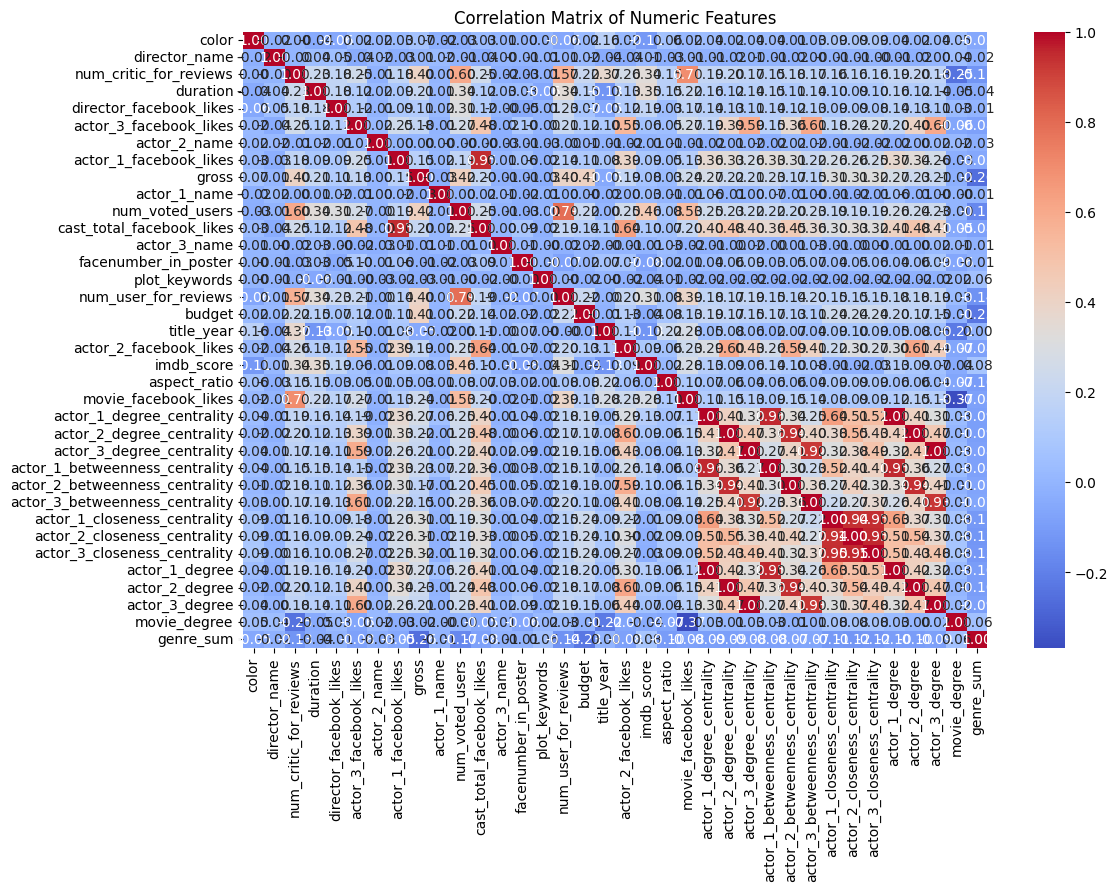

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot correlation matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


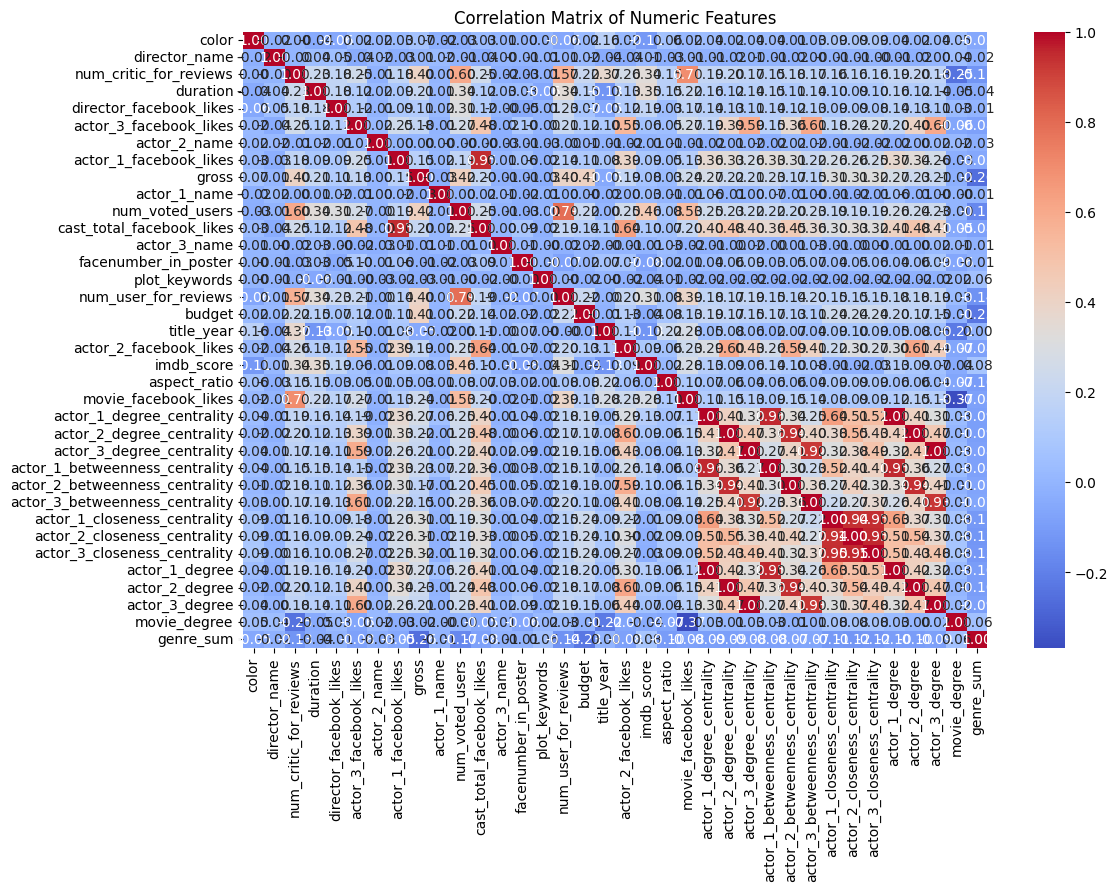

Important Attributes (correlation >  0.5  with gross value):
['gross']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for threshold selection

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Plot correlation matrix using heatmap (optional)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Define a threshold for strong correlation (adjust as needed)
threshold = 0.5  # Attributes with correlation above this are considered important

# Filter attributes with strong positive or negative correlation with gross value
important_attributes = correlation_matrix['gross'].loc[(correlation_matrix['gross'].abs() > threshold)]

# Print the list of important attributes
print("Important Attributes (correlation > ", threshold, " with gross value):")
print(important_attributes.index.tolist())


Based on the correlation matrix you provided, here are the attributes that are highly correlated with gross:

num_user_for_reviews (correlation coefficient: 0.68)
movie_facebook_likes (correlation coefficient: 0.68)
cast_total_facebook_likes (correlation coefficient: 0.62)
num_voted_users (correlation coefficient: 0.62)
actor_1_facebook_likes (correlation coefficient: 0.44)

In [ ]:
important_features = ['num_user_for_reviews','movie_facebook_likes' ,'cast_total_facebook_likes','num_voted_users','actor_1_facebook_likes']

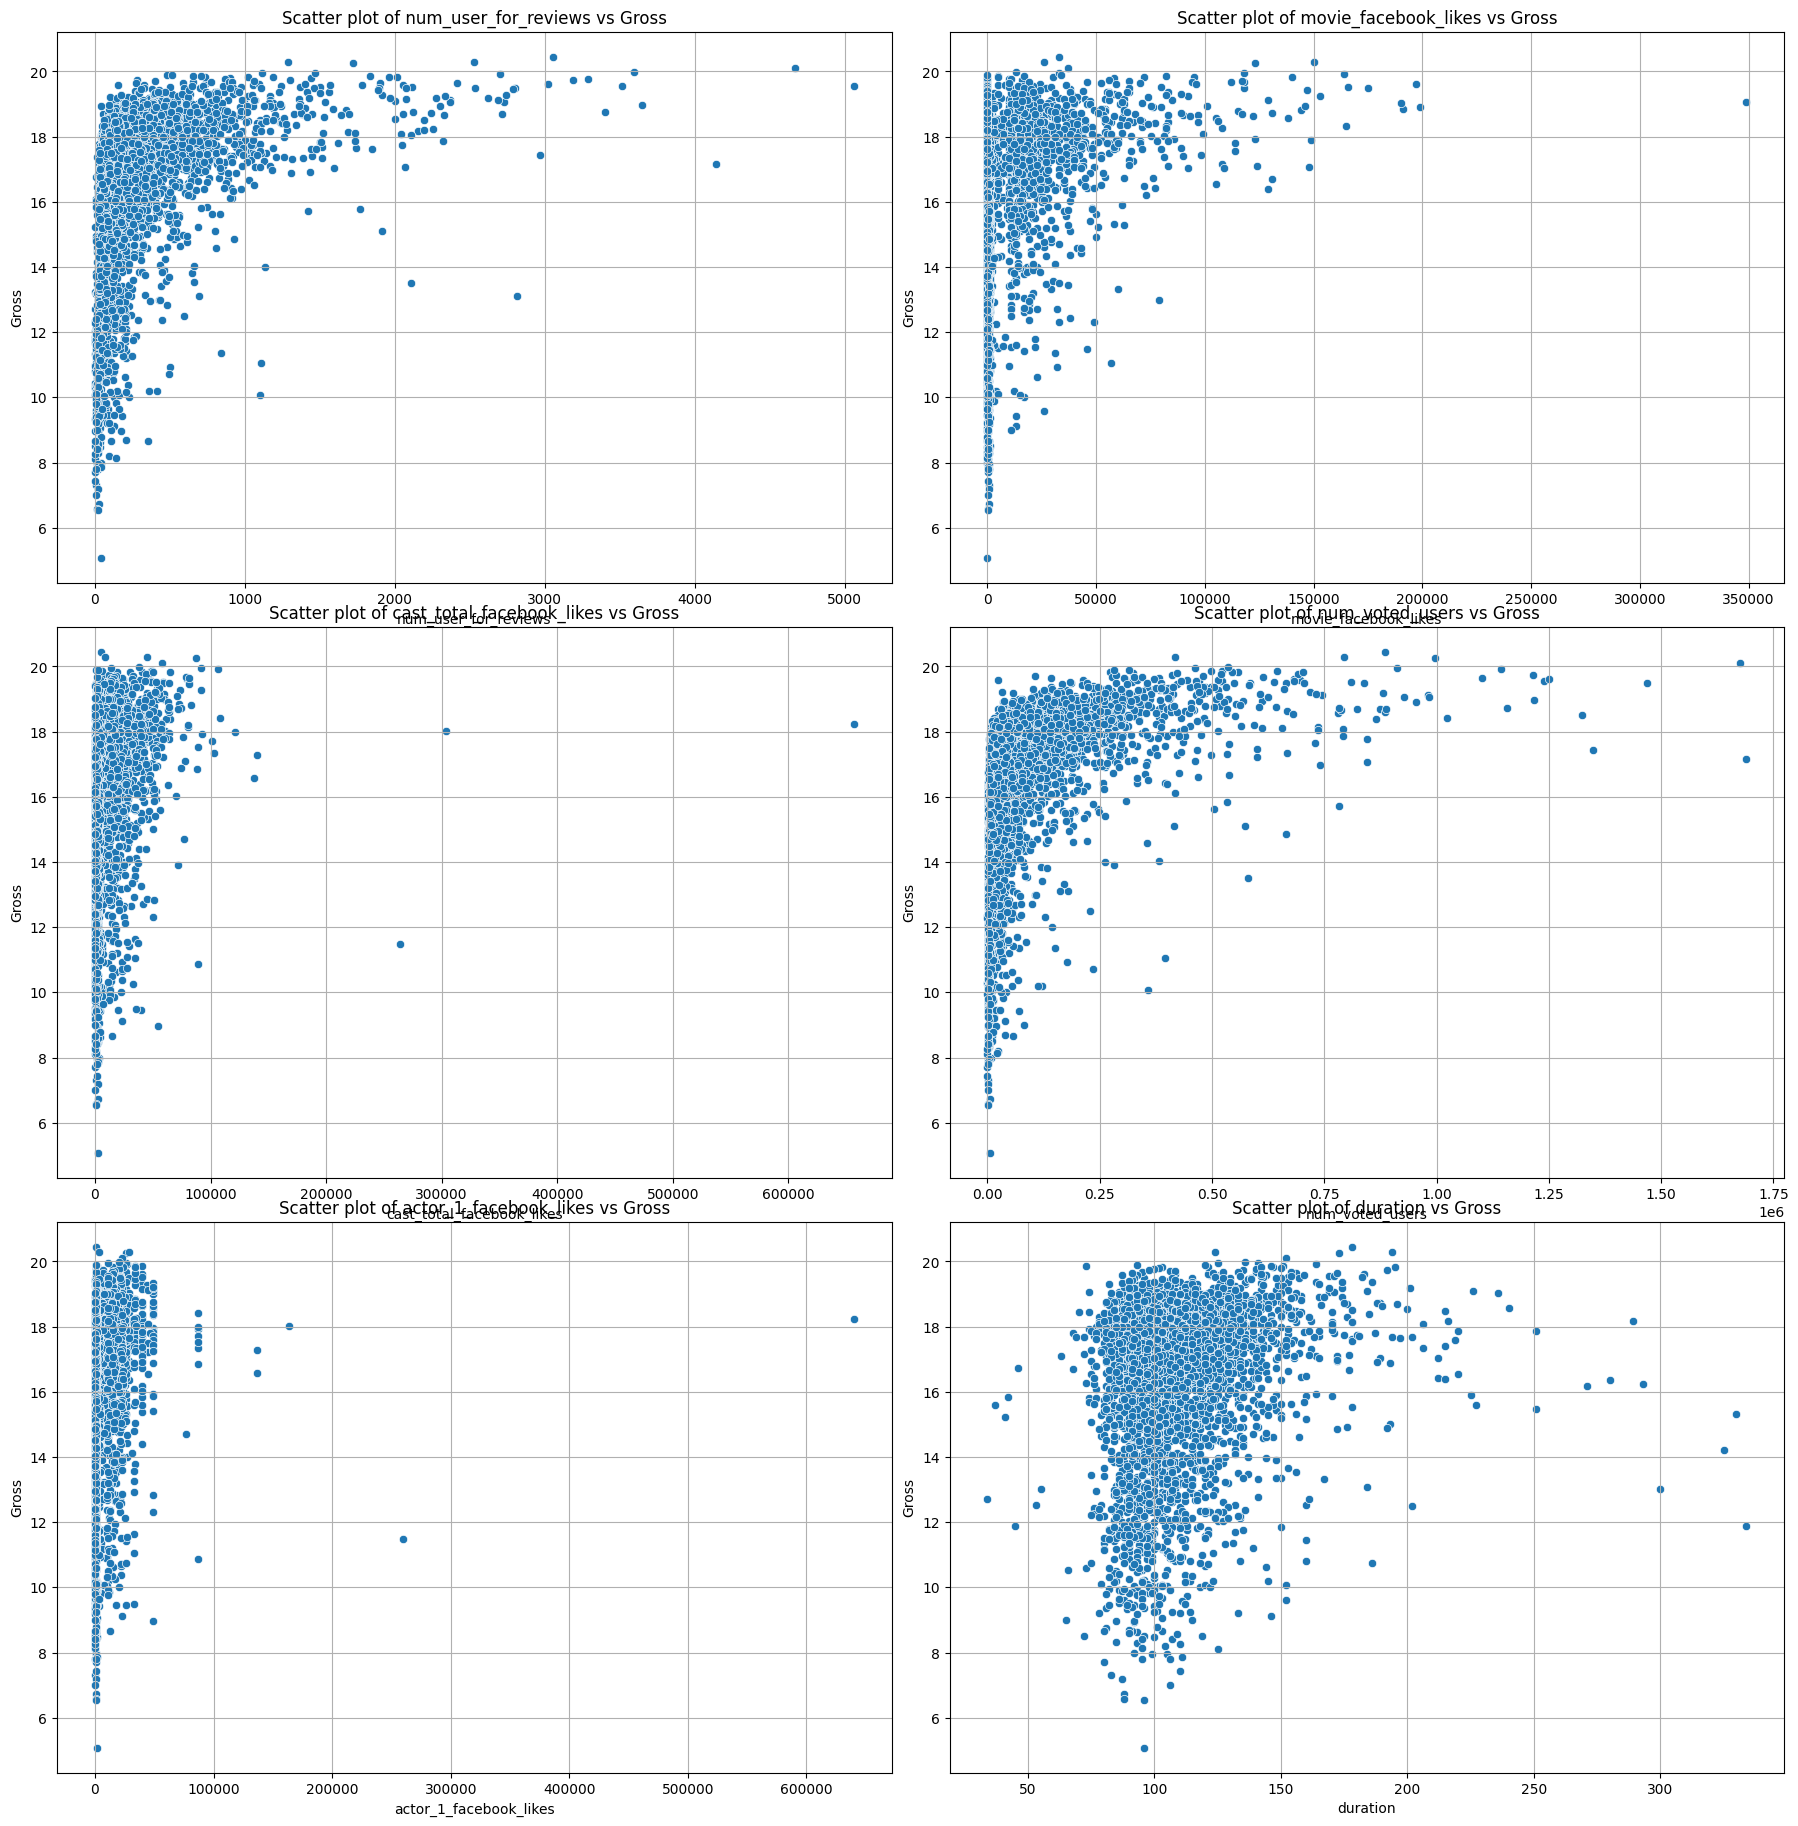

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

important_features = ['num_user_for_reviews', 'movie_facebook_likes', 'cast_total_facebook_likes', 'num_voted_users', 'actor_1_facebook_likes','duration']

# Create a grid of scatter plots arranged in a 3x2 matrix
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
plt.tight_layout()

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot scatter plots for each important feature against 'gross'
for i, feature in enumerate(important_features):
    sns.scatterplot(x=feature, y='gross', data=data, ax=axes[i])
    axes[i].set_title(f'Scatter plot of {feature} vs Gross')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Gross')
    axes[i].grid(True)

# Hide the empty subplot, if any
if len(important_features) < len(axes):
    for j in range(len(important_features), len(axes)):
        axes[j].axis('off')

plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4053 entries, 0 to 4052
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   color                           4053 non-null   int64  
 1   director_name                   4053 non-null   int64  
 2   num_critic_for_reviews          4053 non-null   float64
 3   duration                        4053 non-null   float64
 4   director_facebook_likes         4053 non-null   float64
 5   actor_3_facebook_likes          4053 non-null   float64
 6   actor_2_name                    4053 non-null   int64  
 7   actor_1_facebook_likes          4053 non-null   float64
 8   gross                           4053 non-null   float64
 9   genres                          4053 non-null   object 
 10  actor_1_name                    4053 non-null   int64  
 11  movie_title                     4053 non-null   object 
 12  num_voted_users                 40

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

object_cols = ['genres', 'movie_title', 'language','country']

for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])

print(data.dtypes)


color                               int64
director_name                       int64
num_critic_for_reviews            float64
duration                          float64
director_facebook_likes           float64
actor_3_facebook_likes            float64
actor_2_name                        int64
actor_1_facebook_likes            float64
gross                             float64
genres                              int64
actor_1_name                        int64
movie_title                         int64
num_voted_users                     int64
cast_total_facebook_likes           int64
actor_3_name                        int64
facenumber_in_poster              float64
plot_keywords                       int64
movie_imdb_link                    object
num_user_for_reviews              float64
language                            int64
country                             int64
content_rating                     object
budget                            float64
title_year                        

In [ ]:
data.drop(columns=['movie_imdb_link'], inplace=True)

print(data.head())


   color  director_name  num_critic_for_reviews  duration  \
0      1            709                   723.0     178.0   
1      1            615                   302.0     169.0   
2      1           1581                   602.0     148.0   
3      1            284                   813.0     164.0   
4      1             70                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
0                      0.0                   855.0          1131   
1                    563.0                  1000.0          1785   
2                      0.0                   161.0          2005   
3                  22000.0                 23000.0           432   
4                    475.0                   530.0          2053   

   actor_1_facebook_likes      gross  genres  ...  \
0                  1000.0  20.449494      94  ...   
1                 40000.0  19.550159      88  ...   
2                 11000.0  19.114199     110  ...   
3           

In [ ]:
# 1. Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# 2. Encode categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4053 entries, 0 to 4052
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   color                           4053 non-null   int64  
 1   director_name                   4053 non-null   int64  
 2   num_critic_for_reviews          4053 non-null   float64
 3   duration                        4053 non-null   float64
 4   director_facebook_likes         4053 non-null   float64
 5   actor_3_facebook_likes          4053 non-null   float64
 6   actor_2_name                    4053 non-null   int64  
 7   actor_1_facebook_likes          4053 non-null   float64
 8   gross                           4053 non-null   float64
 9   genres                          4053 non-null   int64  
 10  actor_1_name                    4053 non-null   int64  
 11  movie_title                     4053 non-null   int64  
 12  num_voted_users                 40

In [ ]:
print(data.dropna(subset=["movie_degree"], inplace=True))
print(data.isnull().sum())

None
color                             0
director_name                     0
num_critic_for_reviews            0
duration                          0
director_facebook_likes           0
actor_3_facebook_likes            0
actor_2_name                      0
actor_1_facebook_likes            0
gross                             0
genres                            0
actor_1_name                      0
movie_title                       0
num_voted_users                   0
cast_total_facebook_likes         0
actor_3_name                      0
facenumber_in_poster              0
plot_keywords                     0
num_user_for_reviews              0
language                          0
country                           0
content_rating                    0
budget                            0
title_year                        0
actor_2_facebook_likes            0
imdb_score                        0
aspect_ratio                      0
movie_facebook_likes              0
actor_1_degree_centrali

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'content_rating' column
data['content_rating'] = label_encoder.fit_transform(data['content_rating'])

# Splitting the data into features (X) and target variable (y)
X = data.drop(['gross','genres'], axis=1)  # Replace with your features
y = data['gross']  # Replace with your target variable

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Training Gradient Boosting Regressor (GBM)
gbm_regressor = GradientBoostingRegressor()
gbm_regressor.fit(X_train, y_train)

# Training ElasticNet Regressor
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, y_train)

# Training Neural Network with TensorFlow/Keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluating models
models = {
    'Random Forest': rf_regressor,
    'Gradient Boosting Machine': gbm_regressor,
    'ElasticNet Regression': elastic_net,
    'Neural Network': model
}

for name, model in models.items():
    if name != 'Neural Network':
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # R-squared (R2)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2): {r2}")
    print("\n")


Random Forest Metrics:
Mean Absolute Error (MAE): 0.920365528098037
Mean Squared Error (MSE): 1.9066188169218843
Root Mean Squared Error (RMSE): 1.3808036851492989
R-squared (R2): 0.6373302619959293


Gradient Boosting Machine Metrics:
Mean Absolute Error (MAE): 0.8996393790023356
Mean Squared Error (MSE): 1.8026818072345185
Root Mean Squared Error (RMSE): 1.3426398650548548
R-squared (R2): 0.6571007623904965


ElasticNet Regression Metrics:
Mean Absolute Error (MAE): 16885.256660009516
Mean Squared Error (MSE): 891764283.6173239
Root Mean Squared Error (RMSE): 29862.42260127808
R-squared (R2): -169627989.78161684




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


26/26 [==============================] - 0s 2ms/step
Neural Network Metrics:
Mean Absolute Error (MAE): 1.3545991371963029
Mean Squared Error (MSE): 3.357879204711655
Root Mean Squared Error (RMSE): 1.8324516923268823
R-squared (R2): 0.36127706250788183




In [ ]:
for name, model in models.items():
    if name != 'Neural Network':
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)

    # R-squared (R2)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} R-squared (Accuracy): {r2}")

Random Forest R-squared (Accuracy): 0.6373302619959293
Gradient Boosting Machine R-squared (Accuracy): 0.6571007623904965
ElasticNet Regression R-squared (Accuracy): -169627989.78161684
26/26 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


Neural Network R-squared (Accuracy): 0.36127706250788183
